# Aula 07: K-means
Integrantes:

    1) RM357067 - Edinaldo Rodrigues de Oliveira Junior
    2) RM358158 - Henrique Cardoso
    3) RM358067 - Jefferson de Souza Santos
    4) RM357344 - Walace Vinicius Silva dos Santos

In [20]:
customer = pd.read_csv('/Users/jeffsantos/Desktop/9DTSR/git/9DTSR/Machine Learning/Trabalhinhos/Trabalho Aula 07/Mall_Customers.csv')
customer

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


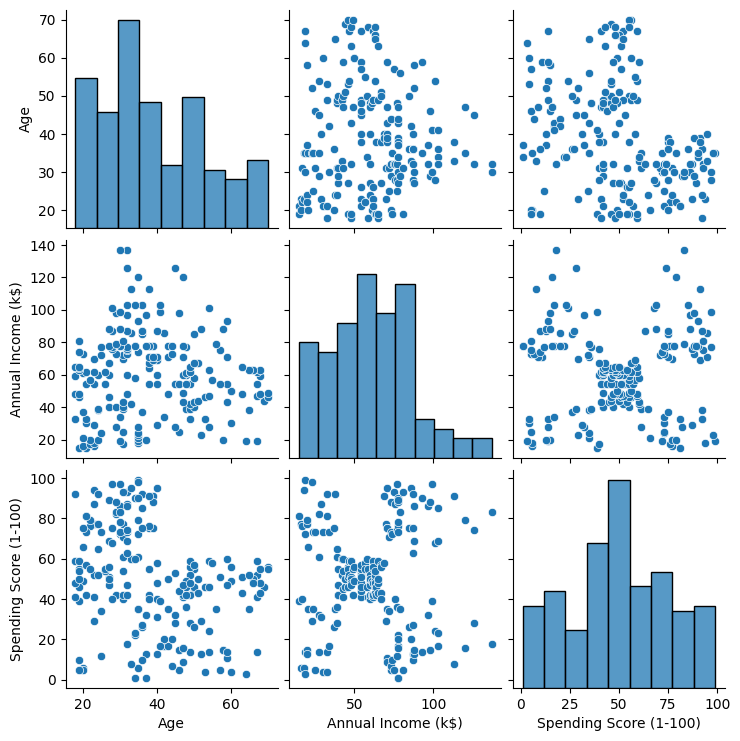

In [23]:
import seaborn as sns
sns.pairplot(customer[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

In [28]:
from sklearn.cluster import KMeans

customer_kpis = customer[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].copy()

kmeans = KMeans(n_clusters=3, random_state = 3)
kmeans.fit(customer_kpis)
kmeans.labels_

customer_kpis['cluster'] = kmeans.labels_
customer_kpis

,Age,Annual Income (k$),Spending Score (1-100),cluster
0,19,15,39,2
1,21,15,81,2
2,20,16,6,0
3,23,16,77,2
4,31,17,40,2
...,...,...,...,...
195,35,120,79,1
196,45,126,28,1
197,32,126,74,1
198,32,137,18,1


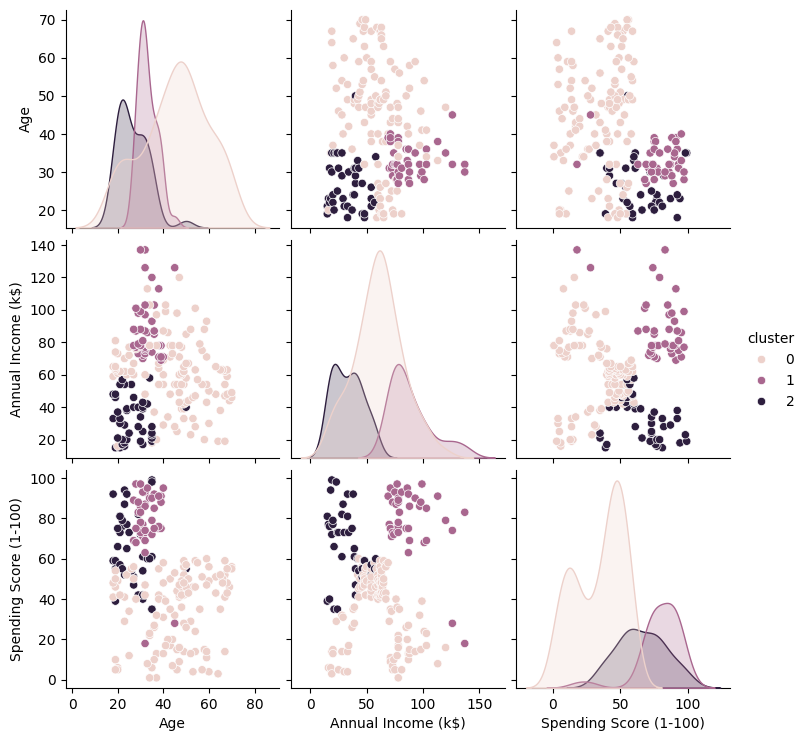

In [32]:
sns.pairplot(customer_kpis, hue = 'cluster')

In [34]:
customer_kpis.groupby('cluster').describe()

Age                                                       \
         count       mean        std   min    25%   50%   75%   max   
cluster                                                               
0        117.0  45.307692  14.309667  18.0  36.00  47.0  55.0  70.0   
1         41.0  32.975610   4.113926  27.0  30.00  32.0  36.0  45.0   
2         42.0  26.595238   6.626111  18.0  21.25  24.5  31.0  50.0   

        Annual Income (k$)             ...               \
                     count       mean  ...   75%    max   
cluster                                ...                
0                    117.0  60.529915  ...  73.0  120.0   
1                     41.0  88.731707  ...  98.0  137.0   
2                     42.0  33.142857  ...  41.5   58.0   

        Spending Score (1-100)                                                 \
                         count       mean        std   min    25%   50%   75%   
cluster                                                                         
0                        117.0  34.470085  17.777151   1.0  16.00  41.0  49.0   
1                         41.0  79.243902  15.837898  18.0  74.00  83.0  90.0   
2                         42.0  65.666667  17.411332  35.0  54.25  63.0  77.0   

               
          max  
cluster        
0        60.0  
1        97.0  
2        99.0  

[3 rows x 24 columns]


# Conclusões

## Grupo 0
- Composto por pessoas mais velhas, com média de idade em torno de 45 anos, e alto poder aquisitivo. Apesar disso, apresentam um baixo score de gastos.
- Esse perfil sugere um público com recursos financeiros, mas que consome pouco — seja por preferência pessoal, hábitos de consumo mais restritivos ou pela falta de opções no shopping que atendam às suas necessidades.

## Grupo 1
- Formado por pessoas com média de idade de 32 anos, poder aquisitivo intermediário e alto score de gastos.
- Possivelmente representa o público-alvo ideal do shopping, por unir propensão ao consumo e uma faixa etária ativa.

## Grupo 2
- Similar ao Grupo 1 em termos de perfil geral, porém com idade média mais baixa e score de gastos mais reduzido.
- Pode representar um público em potencial, ainda em fase de formação de poder de compra.